In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading the file
df = pd.read_csv("data.csv")



In [5]:
#Reading the first five records
df.head()



,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [6]:
#Checking the shape of the file
df.shape

(2382, 8)

# Exploratory Data Analysis

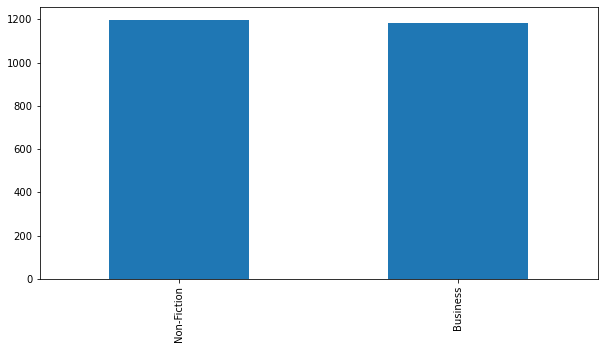

In [7]:
# Genre distribution
df['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

In [8]:
# Printing the book title and description randomly
df['title'] [2264]
df['Desc'][2264]

"In Her Body and Other Parties, Carmen Maria Machado blithely demolishes the arbitrary borders between psychological realism and science fiction, comedy and horror, fantasy and fabulism. While her work has earned her comparisons to Karen Russell and Kelly Link, she has a voice that is all her own. In this electric and provocative debut, Machado bends genre to shape startling narratives that map the realities of women's lives and the violence visited upon their bodies.A wife refuses her husband's entreaties to remove the green ribbon from around her neck. A woman recounts her sexual encounters as a plague slowly consumes humanity. A salesclerk in a mall makes a horrifying discovery within the seams of the store's prom dresses. One woman's surgery-induced weight loss results in an unwanted houseguest. And in the bravura novella Especially Heinous, Machado reimagines every episode of Law & Order: Special Victims Unit, a show we naively assumed had shown it all, generating a phantasmagoric

In [9]:
# Printing the book title and description randomly
df['title'] [367]
df['Desc'][367]

'Finalist for the 2015\xa0Financial Times\xa0and McKinsey Business Book of the YearBest business book of the week from Inc.comThe author of Power, Stanford business school professor, and a leading management thinker offers a hard-hitting dissection of the leadership industry and ways to make workplaces and careers work better.The leadership enterprise is enormous, with billions of dollars, thousands of books, and hundreds of thousands of blogs and talks focused on improving leaders. But what we see worldwide is employee disengagement, high levels of leader turnover and career derailment, and failed leadership development efforts.In Leadership BS, Jeffrey Pfeffer shines a bright light on the leadership industry, showing why it’s failing and how it might be remade. He sets the record straight on the oft-made prescriptions for leaders to be honest, authentic, and modest, tell the truth, build trust, and take care of others. By calling BS on so many of the stories and myths of leadership, 

# Book description — Word count distribution

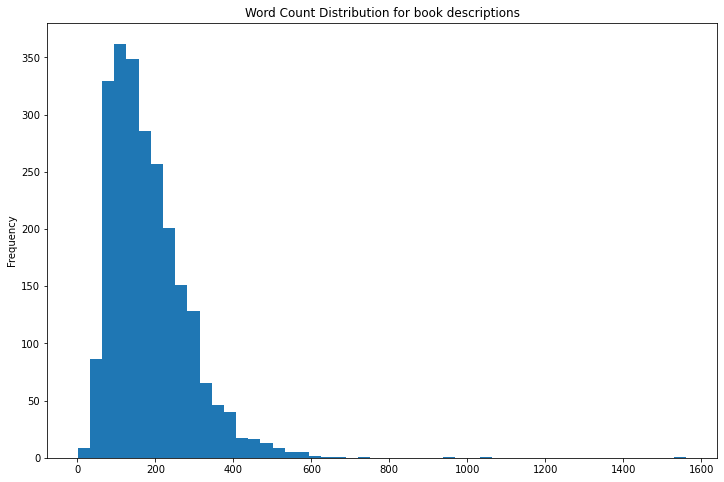

In [10]:
# Calculating the word count for book description
df['word_count'] = df['Desc'].apply(lambda x: len(str(x).split()))# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

# The distribution of top part-of-speech tags in the book descriptions

In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Madhu balini\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

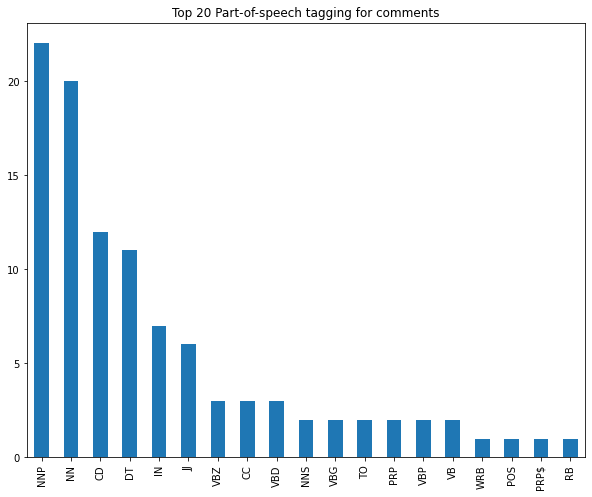

In [12]:
from textblob import TextBlob
blob = TextBlob(str(df['Desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

# Recommendation based on book title

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
# Recommending the Top 5 similar books

def recommendations(title):
    
    # Calling the function vectors

    
  
    # Convert the index into series
    
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(df['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # finding cosine similarity for the vectors

    

    # taking the title and book image link and store in new data frame called books
    books = df[['title', 'image_link']]
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['title']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():

        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['title'])

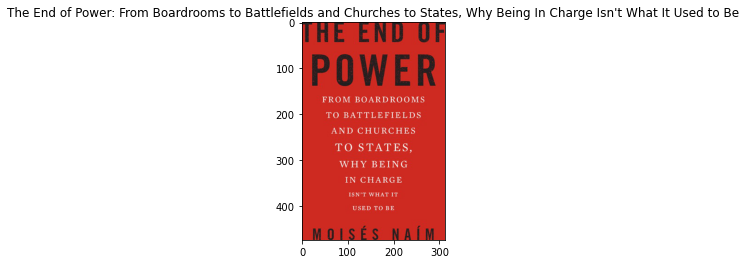

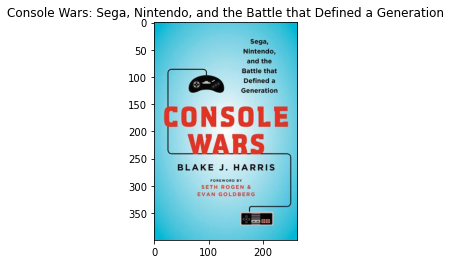

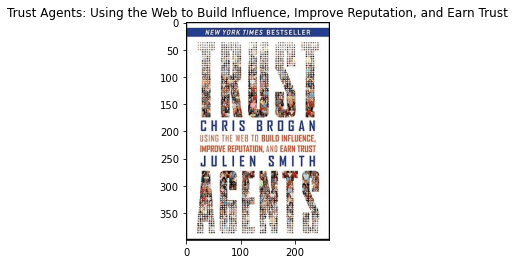

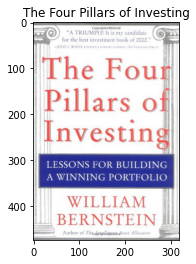

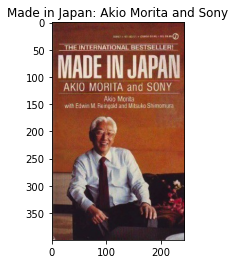

In [25]:
recommendations("The Road Ahead")